In [1]:
from scipy import integrate
from scipy import sparse

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Initial conditions

In [2]:
dx    = 0.01                       # spatial separation
x     = np.arange(-10, 10, dx)       # spatial grid points

kx    = 0.1                        # wave number
m     = 1                          # mass
sigma = 0.1                        # width of initial gaussian wave-packet
x0    = -3.0                        # center of initial gaussian wave-packet

A = 1.0/(sigma*np.sqrt(np.pi)) # normalization constant

##  Initial Wavepacket

In [3]:
psi0 = np.sqrt(A)*np.exp(-(x-x0)**2/(2.0 * sigma**2))*np.exp(1j*kx*x) # gaussian wavepacket
psi0[999]

(1.7535067077554318e-194-1.7535072922952425e-197j)

# Potential $V(x)$

In [4]:
T= 1                   # peroid of SHO
omega =2*np.pi/T  # angular frequency of SHO
V = 0.5*(omega**2)*m*x**2  # potential

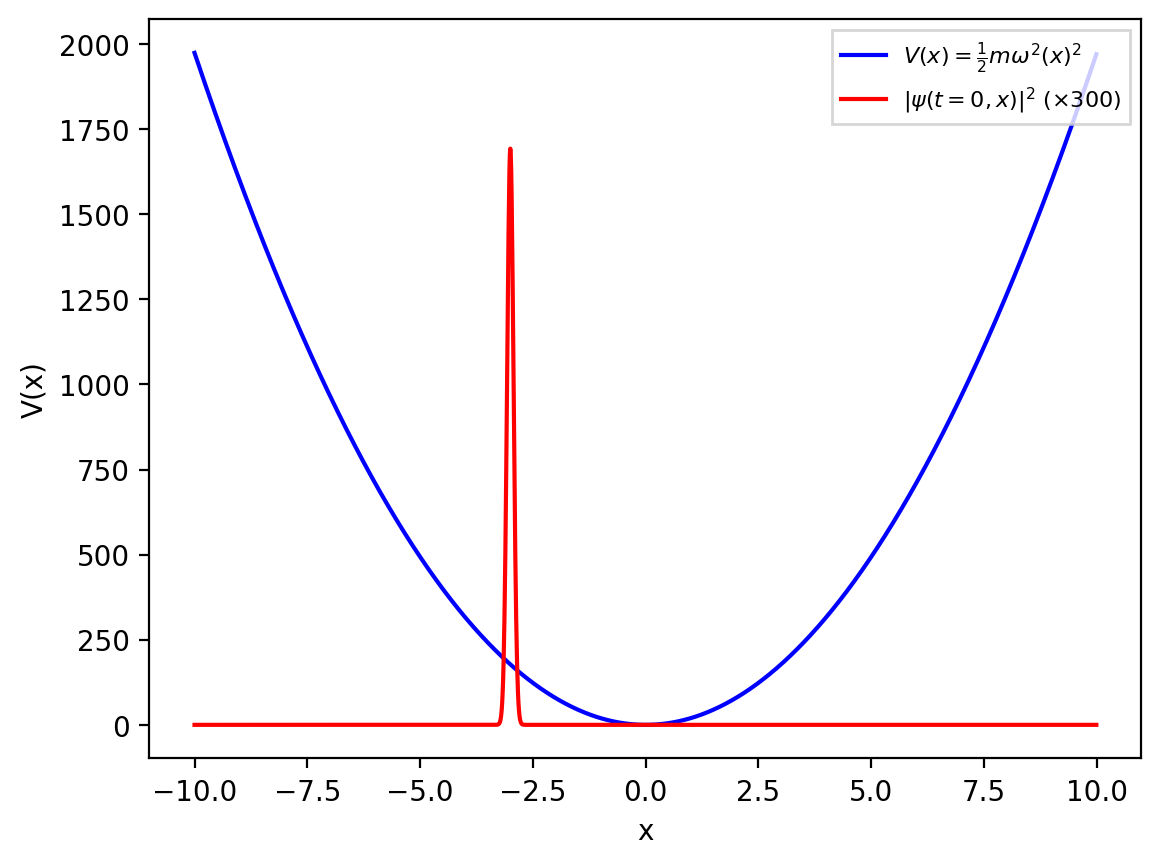

In [6]:
plt.plot(x, V, "b", label=r"$V(x) = \frac{1}{2}m\omega^2 (x)^2$")
plt.plot(x, np.abs(psi0)**2*300, "r", label=r"$\vert\psi(t=0,x)\vert^2$ $(\times 300)$")
plt.xlabel('x')
plt.ylabel('V(x)')
plt.legend(loc=1, fontsize=8, fancybox=False)

In [7]:
 np.sum(np.abs(psi0)**2)*dx ## Total Probability

1.0000000000000213

## Laplace operator approximated by three point finite differences

##  $\frac{\partial^2 \psi(x_n)}{\partial x^2}\approx\frac{1}{dx}\left[\frac{\psi(x_{n+1})-2\psi(x_{n})+\psi(x_{n-1})}{dx}\right]=\frac{1}{dx^2}
{\tiny\begin{pmatrix}
-2&1&0&0&\cdots&0\\
1&-2&1&0&\cdots&0\\
0&1&-2&1&\cdots&0\\
0&0&1&-2&\cdots&0\\
\vdots&\vdots&\vdots&\vdots&\ddots&\vdots\\
0&0&0&0&\cdots&-2
\end{pmatrix}
\begin{pmatrix}
\psi(x_0)\\
\psi(x_1)\\
\psi(x_2)\\
\psi(x_3)\\
\vdots\\
\psi(x_N)\\
\end{pmatrix}}$

In [8]:
D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2
D2.toarray()*dx**2

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

## Schrodinger equation solution

## $\psi_t\equiv  \frac{\partial\psi}{\partial t}=\frac{1}{i \hbar}\left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)\right]\psi$

In [9]:
# RHS of Schrodinger Equation
hbar = 1  # hbar = 1.0545718176461565e-34 J s
def psi_t(t, psi):
    return  (- 0.5 *(hbar**2 / m)* D2.dot(psi) + V * psi)/(1j*hbar)

In [10]:
dt = 0.005  # time interval for snapshots
t0 = 0.0    # initial time
tf = 1.0    # final time
t_grid = np.arange(t0, tf, dt)  # recorded time shots

# Solve the Initial Value Problem
sol = integrate.solve_ivp(psi_t, t_span = [t0, tf], y0 = psi0, t_eval = t_grid, method="RK45")

In [11]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.000e-03 ...  9.900e-01  9.950e-01]
        y: [[ 0.        +0.j          0.        +0.j         ...
              0.00916238+0.0364752j   0.01077817+0.03310077j]
            [ 0.        +0.j          0.        +0.j         ...
             -0.01396152-0.06001026j -0.01750635-0.05434215j]
            ...
            [ 0.        +0.j          0.        +0.j         ...
             -0.0256001 -0.00659384j -0.01983241-0.02732342j]
            [ 0.        +0.j          0.        +0.j         ...
              0.01555204+0.00481807j  0.01257434+0.01798682j]]
      sol: None
 t_events: None
 y_events: None
     nfev: 120092
     njev: 0
      nlu: 0

In [12]:
sol.t

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

In [13]:
sol.y[999,10] ## $\psi(x_{999},t_{10})$

(-0.0020629893979388844-0.00020965872787288446j)

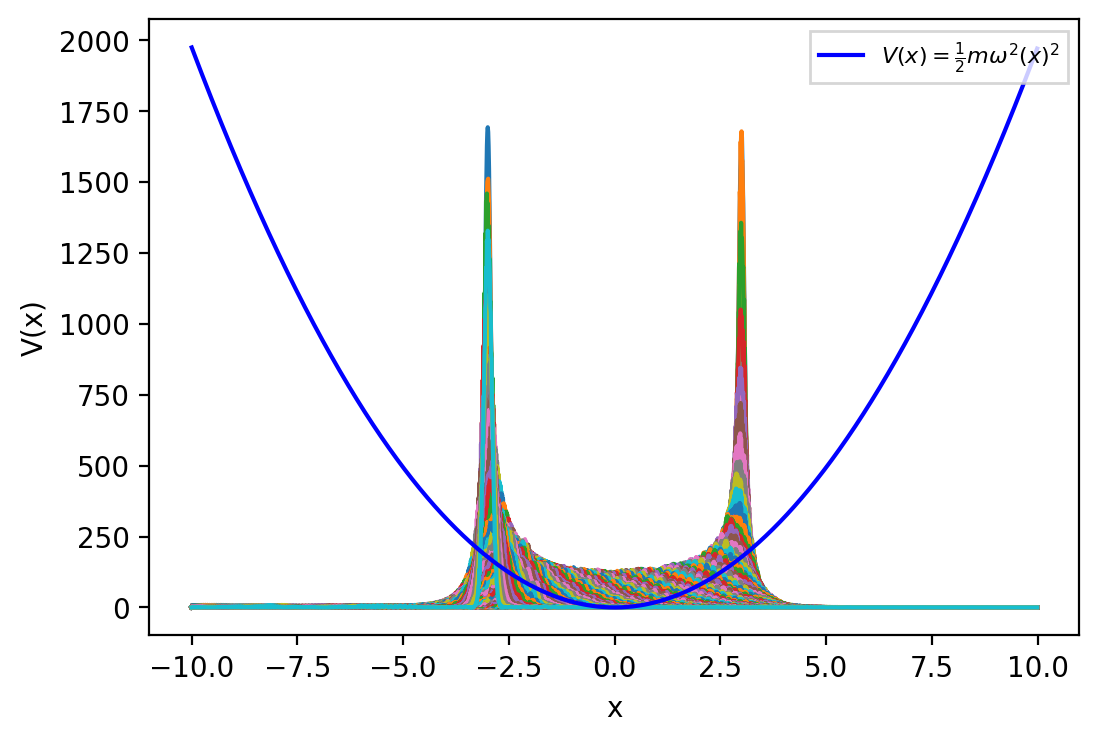

In [20]:
fig = plt.figure(figsize=(6, 4))
for i, t in enumerate(sol.t):
    plt.plot(x, 300*np.abs(sol.y[:,i])**2)             # Plot Wavefunctions x 300
plt.plot(x, V , "b", label=r"$V(x) = \frac{1}{2}m\omega^2 (x)^2$")   # Plot Potential
plt.xlabel('x')
plt.ylabel('V(x)')
plt.legend(loc=1, fontsize=8, fancybox=False)

##Animation

In [21]:
import subprocess
from IPython.display import Image

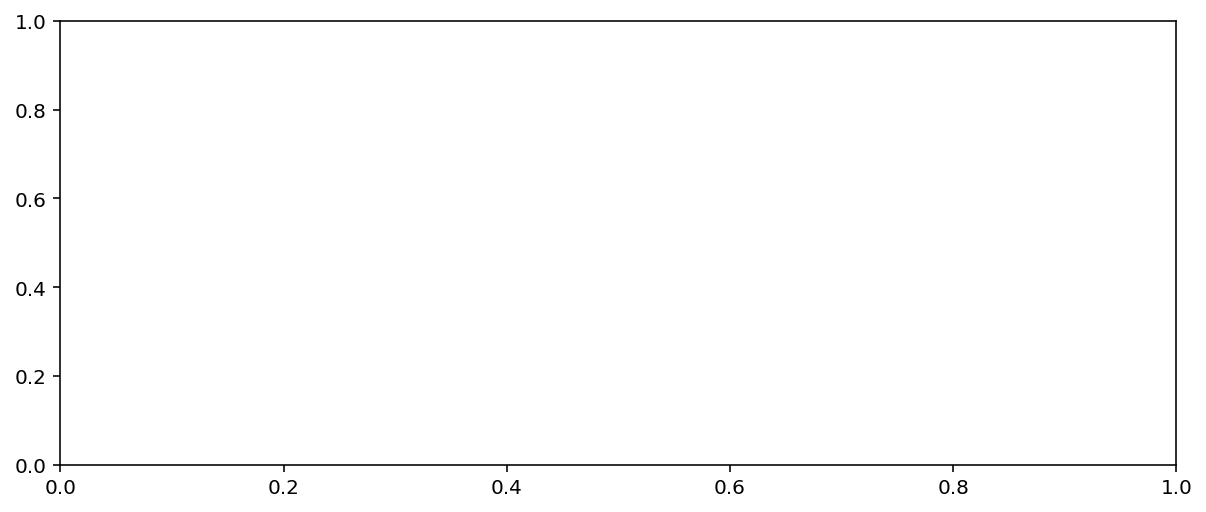

In [22]:
def make_plot(i):
    #Plot and save an image of the oscillator for each time point i
    plt.plot(x,V,'b', label=r"$V(x)$")
    plt.plot(x,300*np.abs(sol.y[:,i])**2,"r")
    plt.xlabel('x')
    plt.ylabel('V(x)')
    plt.savefig('_img{:04d}.png'.format(i//di),dpi=72)
    plt.cla()

# Definition of di: time step in the animation
fps=100   #frames per time unit
di=round(1/(fps*dt))
fig= plt.figure(figsize=(10,4),dpi=72)
ax= fig.add_subplot(111)

for i in range(0,t_grid.size,di):
    #print(i//di, '/', t_grid.size//di)
    make_plot(i)

In [23]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.10.23+dfsg-2.1ubuntu11.7).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [24]:
i="*.png"
o="sho.gif"
subprocess.call("convert -delay 10 -loop 0 "+i+" "+o,shell=True)

0

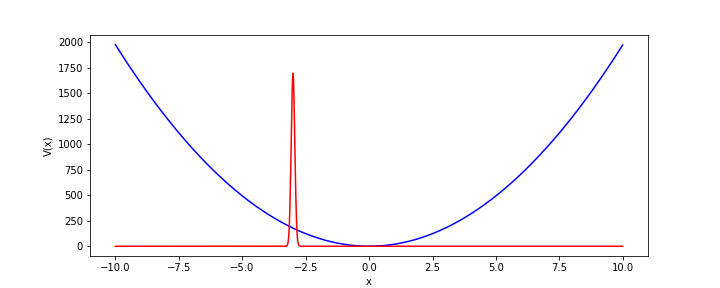

In [25]:
fname='sho.gif'
Image(open(fname,'rb').read())